In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install deepforest

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


No validation file provided. Turning off validation loop
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0
     xmin   ymin   xmax   ymax label     score
0   286.0  206.0  308.0  229.0  Tree  0.619547
1   376.0  162.0  393.0  180.0  Tree  0.577616
2   205.0  151.0  224.0  171.0  Tree  0.550269
3   386.0   45.0  403.0   64.0  Tree  0.546909
4   139.0  307.0  155.0  327.0  Tree  0.546842
5    77.0  174.0   98.0  196.0  Tree  0.541954
6   111.0  150.0  126.0  169.0  Tree  0.527475
7   174.0   71.0  192.0   90.0  Tree  0.507353
8   223.0  182.0  238.0  199.0  Tree  0.498867
9    20.0  135.0   36.0  152.0  Tree  0.489534
10   97.0   98.0  112.0  115.0  Tree  0.461876
11  236.0  274.0  257.0  296.0  Tree  0.449320
12   44.0  131.0   59.0  148.0  Tree  0.435197
13   23.0  168.0   38.0  185.0  Tree  0.431769
14   24.0   71.0

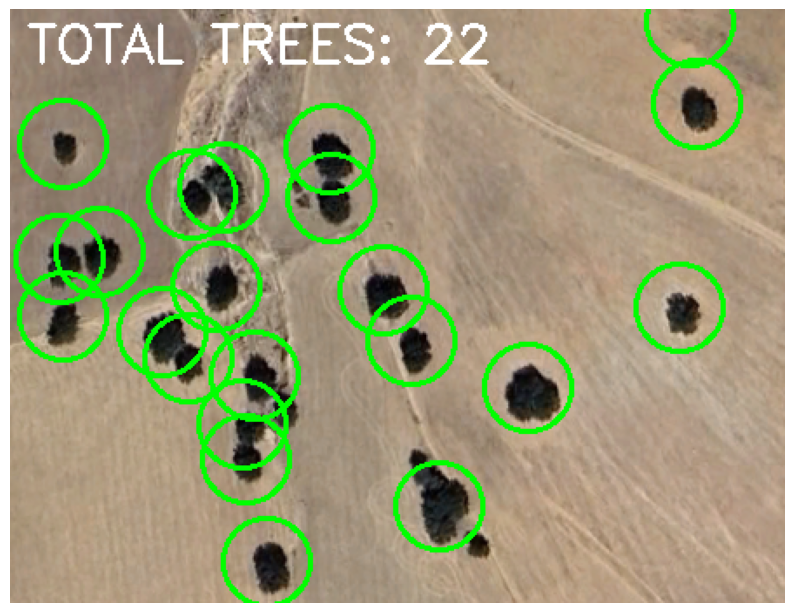

In [4]:
from deepforest import main
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/InternshipProject/Pretraining_Images/Testour.PNG"
img = cv2.imread(img_path)

# Convert the image to the expected format
img_array = np.array(img).astype('float32')

model = main.deepforest()
model.use_release()

# Predict trees in the image
box_info = model.predict_image(img_array)
print(box_info)

# Draw circles around detected trees
for n in range(len(box_info)):
    x = (box_info.iloc[n]['xmin'] + box_info.iloc[n]['xmax']) / 2
    y = (box_info.iloc[n]['ymin'] + box_info.iloc[n]['ymax']) / 2
    cv2.circle(img, (int(x), int(y)), 25, (0, 255, 0), 2)

# Add text to the image
cv2.putText(img, 'TOTAL TREES: ' + str(len(box_info)), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# Convert BGR to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the output image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


No validation file provided. Turning off validation loop
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0
     xmin   ymin   xmax   ymax label     score
0    47.0  294.0   65.0  315.0  Tree  0.629309
1   166.0  138.0  188.0  159.0  Tree  0.607431
2   261.0   45.0  280.0   65.0  Tree  0.589586
3   268.0  301.0  287.0  322.0  Tree  0.572526
4   446.0  136.0  463.0  153.0  Tree  0.557384
5    79.0   93.0   96.0  111.0  Tree  0.548636
6   278.0  124.0  296.0  142.0  Tree  0.546301
7   443.0  351.0  461.0  370.0  Tree  0.544045
8   431.0  215.0  448.0  233.0  Tree  0.528725
9   431.0  109.0  445.0  126.0  Tree  0.527357
10  359.0  184.0  376.0  202.0  Tree  0.518281
11  387.0  291.0  403.0  308.0  Tree  0.503888
12  419.0   51.0  438.0   72.0  Tree  0.501874
13  303.0   64.0  319.0   81.0  Tree  0.498901
14  183.0  203.0

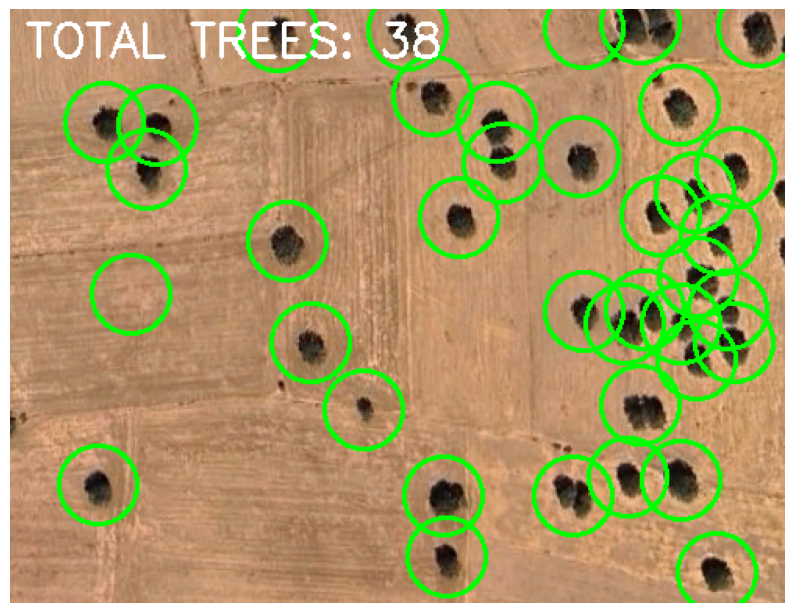

In [5]:
from deepforest import main
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/InternshipProject/Pretraining_Images/El_Feija_National_Park_3.PNG"
img = cv2.imread(img_path)

# Convert the image to the expected format
img_array = np.array(img).astype('float32')

model = main.deepforest()
model.use_release()

# Predict trees in the image
box_info = model.predict_image(img_array)
print(box_info)

# Draw circles around detected trees
for n in range(len(box_info)):
    x = (box_info.iloc[n]['xmin'] + box_info.iloc[n]['xmax']) / 2
    y = (box_info.iloc[n]['ymin'] + box_info.iloc[n]['ymax']) / 2
    cv2.circle(img, (int(x), int(y)), 25, (0, 255, 0), 2)

# Add text to the image
cv2.putText(img, 'TOTAL TREES: ' + str(len(box_info)), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# Convert BGR to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the output image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()
